# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [4]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

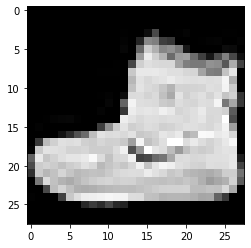

In [6]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

## EL CÓDIGO DEL ALUMNO EMPIEZA AQUÍ:##

In [8]:
from tensorflow import keras
print(keras.__version__)

2.4.0


In [9]:
# Primero analizamos el tamaño en píxeles de las imágenes, así como las etiquetas disponibles
print(training_images.shape)  
print(set(training_labels))

(60000, 28, 28)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [10]:
# Clasificamos con strings las etiquetas de ropa según la información de https://www.tensorflow.org/datasets/catalog/fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[training_labels[0]])

Ankle boot


In [ ]:
# El dataset se compone de 60000 imágenes, las cuales son de 28x28 píxeles (tamaño que se empleará en la función Flatten)
# El dataset tiene 10 tipos de etiquetas (prendas de ropa), del 0 al 9, pudiendo renombrarse con 'class names'
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) # input_shape se corresponde con el tamaño de píxeles (28x28).
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax")) # la capa de salida ha de tener tantos valores como variedad de labels tiene el dataset (10).

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels))
# En el entrenamiento se comprueba que un validation split y un verbose (a pesar de no ser considerados en el enunciado), mejoran el accuracy del modelo (de lo contrario no llegaba al 80%).

Epoch 1/10
629/629 [==============================] - 3s 4ms/step - loss: 0.9075 - accuracy: 0.7104 - val_loss: 0.4876 - val_accuracy: 0.8265
Epoch 2/10
629/629 [==============================] - 2s 3ms/step - loss: 0.4498 - accuracy: 0.8416 - val_loss: 0.4186 - val_accuracy: 0.8505
Epoch 3/10
629/629 [==============================] - 2s 3ms/step - loss: 0.4039 - accuracy: 0.8548 - val_loss: 0.3977 - val_accuracy: 0.8579
Epoch 4/10
629/629 [==============================] - 2s 3ms/step - loss: 0.3710 - accuracy: 0.8667 - val_loss: 0.3693 - val_accuracy: 0.8658
Epoch 5/10
629/629 [==============================] - 2s 3ms/step - loss: 0.3459 - accuracy: 0.8771 - val_loss: 0.3798 - val_accuracy: 0.8635
Epoch 6/10
629/629 [==============================] - 2s 3ms/step - loss: 0.3414 - accuracy: 0.8754 - val_loss: 0.3697 - val_accuracy: 0.8674
Epoch 7/10
629/629 [==============================] - 2s 3ms/step - loss: 0.3286 - accuracy: 0.8824 - val_loss: 0.3482 - val_accuracy: 0.8752
Epoch 

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

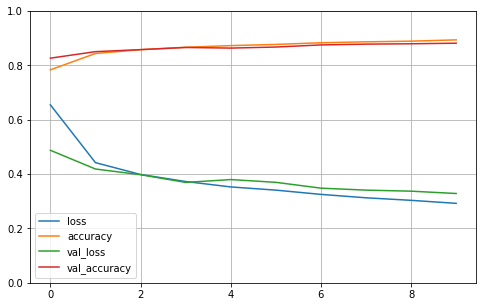

In [ ]:
# Evalúamos el loss y el accuracy en la siguiente gráfica
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
# También podemos evaluar el modelo con la información de test usando "evaluate"
print("Evaluación sobre los datos de test")
results = model.evaluate(test_images, test_labels)
print("test loss, test accuracy:", results)

Evaluación sobre los datos de test
313/313 [==============================] - 0s 1ms/step - loss: 0.3556 - accuracy: 0.8710
test loss, test accuracy: [0.35560938715934753, 0.8709999918937683]


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

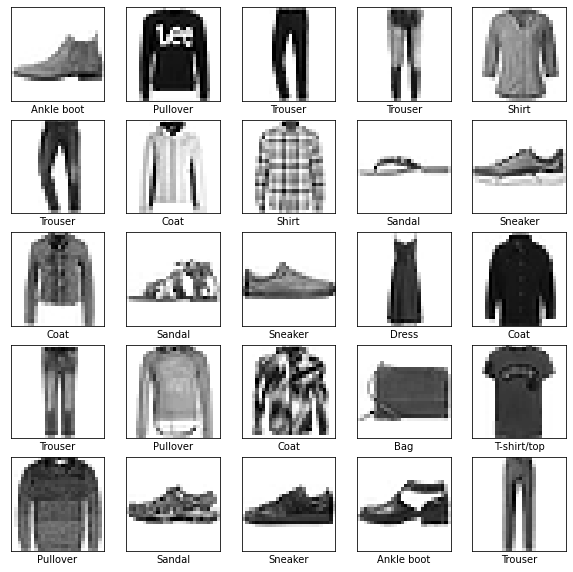

In [ ]:
# También podemos comprobar el funcionamiento de la red con algunas predicciones, para ello compararemos 25 imágenes de test con la predicción de sus etiquetas.
# Imprimimos primero las 25 primeras imágenes de test con sus respectivas etiquetas (todavía no predecimos, sólo es para comparar luego):
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
# Podemos hacer una sola predicción a partir de las imágenes test. 
classifications = model.predict(test_images)
# Imprimiremos tal cual la primera entrada de clasificación.
print(classifications[0])

[2.0764246e-05 1.6672062e-06 7.9866819e-05 2.3929195e-05 2.6256077e-05 1.0202556e-01 1.7308614e-04 6.9409907e-02 1.0073386e-03 8.2723165e-01]


Tu respuesta a la pregunta 3.1 aquí:

In [ ]:
# El resultado de la primera entrada de clasificación es un vector (un array o lista de una dimensión) que representa, variable a variable, la probabilidad predictora de cada una de las clases.
# La clase más probable, la última, tiene una probabilidad de acierto de 8.27e-01 para nuestra red neuronal.

9
Ankle boot


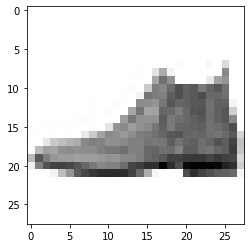

In [ ]:
# Ahora, comprobamos que la etiqueta más probable (np.argmax) para la imagen 0 coincide con la imagen de test 0:
print ( np.argmax(classifications[0]) )
print ( class_names[np.argmax(classifications[0])] )
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

Tu respuesta a la pregunta 3.2 aquí:

In [ ]:
# La clase para la primera entrada de "classifications" es el campo 9 del vector (como se había explicado en el apartado anterior es la última variable, la que resulta más probable).
# Según los class_names esta variable corresponde a "Ankle boot", el cual coincide con la etiqueta test_label de la primera entrada; por lo que se deduce que la predicción es acertada.
# Se ha demostrado el acierto de la predicción visualizando la imagen a la que corresponde.

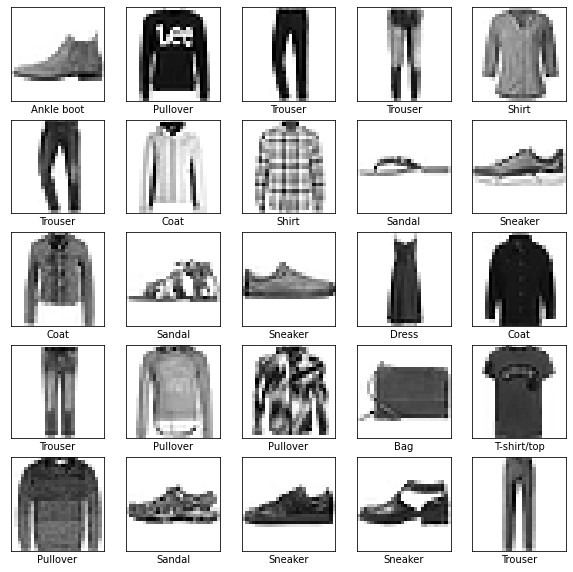

In [ ]:
# Por último, comparamos las 25 imágenes de test mostradas más arriba con la etiqueta predicha para cada una:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(classifications[i])])
plt.show()

In [ ]:
# Se comprueba que la etiqueta predicha casi siempre coincide con la etiqueta de test.
# Se produce un error de predicción en la imagen 17 (entiende "pullover", cuando debería ser "coat") y en la 23 (entiende "Sneaker" cuando debería ser "ankle boot").

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [ ]:
# Generamos una función de diseño, compilación, entrenamiento y evaluación; únicamente parametrizable por el número de neuronas de su capa oculta
def dcee (num_neuronas):
  print("RED NEURONAL PARA " + str(num_neuronas) + " NEURONAS EN LA CAPA OCULTA:")
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28,28])) 
  model.add(keras.layers.Dense(num_neuronas, activation="sigmoid"))
  model.add(keras.layers.Dense(10, activation="softmax")) 

  model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

  history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels))
  print("")
  print("Evaluación sobre los datos de test:")
  model.evaluate(test_images, test_labels)
  print("---------------------------------------------------------------------------------------------------------------------")

In [ ]:
# Ejecutamos la función con una red neuronal de 512 neuronas y otra de 1024 en la capa oculta
dcee (512)
dcee (1024)

RED NEURONAL PARA 512 NEURONAS EN LA CAPA OCULTA:
Epoch 1/10
629/629 [==============================] - 5s 7ms/step - loss: 0.7443 - accuracy: 0.7455 - val_loss: 0.4649 - val_accuracy: 0.8348
Epoch 2/10
629/629 [==============================] - 4s 6ms/step - loss: 0.4322 - accuracy: 0.8461 - val_loss: 0.4498 - val_accuracy: 0.8297
Epoch 3/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3922 - accuracy: 0.8599 - val_loss: 0.3992 - val_accuracy: 0.8536
Epoch 4/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3652 - accuracy: 0.8684 - val_loss: 0.3676 - val_accuracy: 0.8681
Epoch 5/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3426 - accuracy: 0.8748 - val_loss: 0.3639 - val_accuracy: 0.8704
Epoch 6/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3270 - accuracy: 0.8783 - val_loss: 0.3490 - val_accuracy: 0.8720
Epoch 7/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3124 - accuracy: 0.886

Tu respuesta a la pregunta 4.3 aquí:

In [ ]:
# Como era de esperar, las redes neuronales tardan más tiempo en entrenarse que la de 128 neuronas. 
# Cada epoch tarda de media 2 , 4 y 7 segundos para las redes de 128, 512 y 1024 neuronas en una sola capa oculta respectivamente, siendo el resto de hiperparámetros iguales.
# Aunque el accuracy de la red de 512 mejora, paradójicamente la red de 1024 neuronas empeora un poco. Esto es debido a que el modelo se está sobreajustando, es decir, produce un "overfitting" (alta varianza).
# Cuando se produce "overfitting" la red pierde capacidad de generalización y de abstracción, por lo que aprende cada caso como aislado clasificando mal las predicciones.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [ ]:
# Generamos una función de diseño, compilación, entrenamiento y evaluación; únicamente parametrizable por el número de neuronas de su capa oculta, agregando predicción sobre la primera imagen
def dcee_predict (num_neuronas):
  print("RED NEURONAL PARA " + str(num_neuronas) + " NEURONAS EN LA CAPA OCULTA:")
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28,28])) 
  model.add(keras.layers.Dense(num_neuronas, activation="sigmoid"))
  model.add(keras.layers.Dense(10, activation="softmax")) 

  model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

  history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels))
  print("")
  classifications = model.predict(test_images)
  print("Primera imagen de test:")
  print ( class_names[test_labels[0]] ) 
  print("Primera imagen predicha (classifications):")
  print ( class_names[np.argmax(classifications[0])] )
  print("---------------------------------------------------------------------------------------------------------------------")

In [ ]:
# Ejecutamos la función con una red neuronal de 512 neuronas y otra de 1024 en la capa oculta, comparando la primera imagen de test contra la predicción de la misma
dcee_predict (512)
dcee_predict (1024)

RED NEURONAL PARA 512 NEURONAS EN LA CAPA OCULTA:
Epoch 1/10
629/629 [==============================] - 4s 6ms/step - loss: 0.7681 - accuracy: 0.7393 - val_loss: 0.4805 - val_accuracy: 0.8232
Epoch 2/10
629/629 [==============================] - 4s 6ms/step - loss: 0.4397 - accuracy: 0.8429 - val_loss: 0.4313 - val_accuracy: 0.8475
Epoch 3/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3944 - accuracy: 0.8548 - val_loss: 0.3962 - val_accuracy: 0.8571
Epoch 4/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3683 - accuracy: 0.8660 - val_loss: 0.3684 - val_accuracy: 0.8644
Epoch 5/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3410 - accuracy: 0.8740 - val_loss: 0.3502 - val_accuracy: 0.8763
Epoch 6/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3215 - accuracy: 0.8839 - val_loss: 0.3504 - val_accuracy: 0.8728
Epoch 7/10
629/629 [==============================] - 4s 6ms/step - loss: 0.3076 - accuracy: 0.886

Tu respuesta a la pregunta 5.1 aquí:

In [ ]:
# Tanto para la red de 512 neuronas como para la red de 1024 neuronas la predicción sigue siendo acertada para la primera imagen del dataset 
# (es decir, la etiqueta de la primera imagen del test coincide con la etiqueta predicha para dicha imagen)

Tu respuesta a la pregunta 5.2 aquí:

In [ ]:
# Aunque la red de 1024 puede estar sobreajustada su capacidad predictiva sigue siendo alta, por lo que sigue siendo capaz de acertar en la predicción.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [ ]:
model= keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28])) 
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax")) 

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10


InvalidArgumentError: ignored

Tu respuesta a la pregunta 6 aquí:

In [ ]:
# La capa flaten cumple la función de reducir la dimensión de las imágenes a un solo vector, esto es, colocando el valor de los píxeles en una sola línea e introduciendo dichos valores uno a uno.
# La red neuronal no es capaz de asumir las imágenes como arrays de varias dimensiones.
# Por estas razones, las redes neuronales que emplean imágenes requieren de una capa de entrada flatten para reducir la dimensión de las mismas.

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) 
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(5, activation="softmax")) 

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10


InvalidArgumentError: ignored

Tu respuestas a la pregunta 7.1 aquí:

In [ ]:
# La última capa ha de tener el mismo número de neuronas de salida que tipos de etiquetas distintas presentes en el modelo.
# Por lo tanto, para el dataset de Fashion MNIST ha de tener 10 neuronas puesto que dicho dataset consta de 10 tipos distintos de etiquetas.

Tu respuestas a la pregunta 7.2 aquí:

In [ ]:
# De ser el valor distinto obtendríamos un error.
# Como se muestra en el código previo, para 5 neuronas de salida, el programa arroja un error "InvalidArgumentError:  Received a label value of 9 which is outside the valid range of [0, 5)".
# Este mensaje informa de que las etiquetas están por encima del rango de 0 a 5, es decir, que sobrepasa el número de neuronas de salida. 

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [11]:
# Generamos una función de diseño, compilación, entrenamiento y evaluación; únicamente parametrizable por el valor de epoch
def dcee_epoch (epoch_val):
  print("RED NEURONAL PARA " + str(epoch_val) + " EPOCH EN EL ENTRENAMIENTO")
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28,28])) 
  model.add(keras.layers.Dense(128, activation="sigmoid"))
  model.add(keras.layers.Dense(10, activation="softmax")) 

  model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"])

  history = model.fit(training_images, training_labels, validation_split=0.33, epochs=epoch_val, batch_size=64, verbose=1, validation_data=(test_images, test_labels))
  print("")
  print("Evaluación sobre los datos de test:")
  model.evaluate(test_images, test_labels)
  print("---------------------------------------------------------------------------------------------------------------------")

In [12]:
dcee_epoch(15)
dcee_epoch(30)

RED NEURONAL PARA 15 EPOCH EN EL ENTRENAMIENTO
Epoch 1/15
629/629 [==============================] - 3s 4ms/step - loss: 0.9217 - accuracy: 0.7148 - val_loss: 0.4882 - val_accuracy: 0.8343
Epoch 2/15
629/629 [==============================] - 2s 3ms/step - loss: 0.4571 - accuracy: 0.8405 - val_loss: 0.4177 - val_accuracy: 0.8508
Epoch 3/15
629/629 [==============================] - 2s 3ms/step - loss: 0.4110 - accuracy: 0.8517 - val_loss: 0.3946 - val_accuracy: 0.8572
Epoch 4/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3750 - accuracy: 0.8659 - val_loss: 0.3790 - val_accuracy: 0.8631
Epoch 5/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3546 - accuracy: 0.8707 - val_loss: 0.3766 - val_accuracy: 0.8639
Epoch 6/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3444 - accuracy: 0.8746 - val_loss: 0.3615 - val_accuracy: 0.8688
Epoch 7/15
629/629 [==============================] - 2s 3ms/step - loss: 0.3309 - accuracy: 0.8806 -

Tu respuesta a la pregunta 8.3 aquí:

In [ ]:
# La función loss es una predicción de error de la red neuronal. Loss se emplea para calcular los gradientes y éstos se emplean para actualizar los pesos de la red neuronal.
# El caso de 15 epoch mejora con respecto al original de 10. Sin embargo el loss empieza a crecer y variar cuando empleamos 30 epoch en el entrenamiento. 
# Esto sucede porque, como el learning rate es alto, divergerá y fallará para encontrar el mínimo de la función loss. Una solución sería reducir el learning rate después de varios epoch.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [17]:
# Clase para hacer Early Stop teniendo en cuenta el Accuracy al 85%
class myCallback_accuracy(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [20]:
# Hacemos una llamada a la clase
callback_acc = myCallback_accuracy()
# Introducimos el modelo del ejercicio 1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) 
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="softmax")) 

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(training_images, training_labels, validation_split=0.33, epochs=10, batch_size=64, verbose=1, validation_data=(test_images, test_labels), callbacks=[callback_acc])

Epoch 1/10
629/629 [==============================] - 3s 4ms/step - loss: 0.9385 - accuracy: 0.7102 - val_loss: 0.4761 - val_accuracy: 0.8321
Epoch 2/10
629/629 [==============================] - 2s 3ms/step - loss: 0.4630 - accuracy: 0.8375 - val_loss: 0.4333 - val_accuracy: 0.8446
Epoch 3/10
629/629 [==============================] - 2s 3ms/step - loss: 0.4082 - accuracy: 0.8547 - val_loss: 0.3988 - val_accuracy: 0.8557

Alcanzado el 85% de precisión, se cancela el entrenamiento!!


**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [26]:
# Clase para hacer Early Stop teniendo en cuenta el Loss al 40%
class myCallback_loss(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')< 0.4):
              print("\nAlcanzado el 40% de pérdida, se cancela el entrenamiento!!")
              self.model.stop_training = True

In [27]:
# Hacemos una llamada a la clase
callback_loss = myCallback_loss()
# Introducimos el modelo del ejercicio 1, pero cambiando el número de neuronas de la capa oculta a 512 y la función de activación a relu, como se propone en el enunciado.
# También se ajusta el entrenamiento a 50 epochs y se retira el número de batch, verbose y validation split como se propone en el enunciado.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) 
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) 

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, validation_data=(test_images, test_labels), callbacks=[callback_loss])

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5828 - accuracy: 0.7955 - val_loss: 0.3937 - val_accuracy: 0.8593
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3685 - accuracy: 0.8664 - val_loss: 0.3706 - val_accuracy: 0.8669

Alcanzado el 40% de pérdida, se cancela el entrenamiento!!
